In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


 Data cleaning 

In [6]:
df . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.drop(["Cabin"],axis=1,inplace=True)

In [10]:
# fill null value of age column by mean 
df["Age"].fillna(df["Age"].mean(), inplace=True)


C:\Users\Amit\AppData\Local\Temp\ipykernel_13908\353793574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
# Encoding the categorical columns 


In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [14]:
df["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [15]:
df["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [17]:
df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

C:\Users\Amit\AppData\Local\Temp\ipykernel_13908\2493156400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


In [21]:
# Tukeys method use for interquartile range
# IQR=Q3-Q1
# lower limit = Q1-1.5*IQR
# Upper limit = Q3-1.5*IQR


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.907576,0.685516
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [30]:
# IQR for Pclass

Q1 = df["Pclass"].quantile(0.25)
Q3 = df["Pclass"].quantile(0.75)
Q1,Q3
IQR = Q3-Q1
IQR
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(np.float64(-2.0), np.float64(6.0))

In [33]:
df[(df.Pclass<lower_limit)|(df.Pclass>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [6]:
# IQR for Age

Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
Q1,Q3
IQR = Q3-Q1
IQR
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(np.float64(-6.0), np.float64(66.0))

In [7]:
df[(df.Age<lower_limit)|(df.Age>upper_limit)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [9]:
# IQR for Fare

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
Q1,Q3
IQR = Q3-Q1
IQR
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(np.float64(-27.5105), np.float64(66.9063))

In [10]:
df[(df.Fare<lower_limit)|(df.Fare>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S


In [12]:
# IQR for Parch 	

Q1 = df["Parch"].quantile(0.25)
Q3 = df["Parch"].quantile(0.75)
Q1,Q3
IQR = Q3-Q1
IQR
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(np.float64(0.0), np.float64(0.0))

In [13]:
df[(df.Parch<lower_limit)|(df. Parch>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
21,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
23,915,0,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...,...,...
397,1289,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
402,1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S


C:\Users\Amit\AppData\Local\Temp\ipykernel_10332\731030244.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(Y.dropna().values, labels=Y.columns, patch_artist=True)


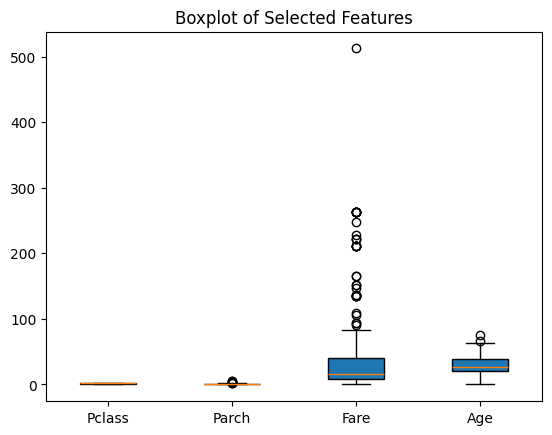

In [6]:
Y = df[["Pclass","Parch","Fare","Age"]]  # DataFrame with selected columns
Y


import matplotlib.pyplot as plt

plt.boxplot(Y.dropna().values, labels=Y.columns, patch_artist=True)
plt.title("Boxplot of Selected Features")
plt.show()


In [ ]:
# Z score for outlier


In [34]:
from scipy.stats import zscore

# Compute Z-score for each column in Y
Y_zscore = Y.apply(zscore)

# Display the first few rows
Y_zscore.head()


,Pclass,Parch,Fare,Age
0,0.873482,-0.400248,NaN,NaN
1,0.873482,-0.400248,NaN,NaN
2,-0.315819,-0.400248,NaN,NaN
3,0.873482,-0.400248,NaN,NaN
4,0.873482,0.619896,NaN,NaN


In [33]:
!pip install scikit-learn



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.1 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.1 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.1 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 1.9 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.1 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/11.1 MB 2.2 MB/s eta 0:00:03
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# minmax scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Y_scaled = pd.DataFrame(scaler.fit_transform(Y), columns=Y.columns)

# Display first few rows
Y_scaled.head()


,Pclass,Parch,Fare,Age
0,1.0,0.000000,0.015282,0.452723
1,1.0,0.000000,0.013663,0.617566
2,0.5,0.000000,0.018909,0.815377
3,1.0,0.000000,0.016908,0.353818
4,1.0,0.111111,0.023984,0.287881


In [ ]:
# Principle component analysis


In [4]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]  

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled

array([[-1.72791209, -0.75592895,  0.87348191, ..., -0.49947002,
        -0.4002477 , -0.49781052],
       [-1.71962474,  1.32287566,  0.87348191, ...,  0.61699237,
        -0.4002477 , -0.51265996],
       [-1.71133739, -0.75592895, -0.31581919, ..., -0.49947002,
        -0.4002477 , -0.46453181],
       ...,
       [ 1.71133739, -0.75592895,  0.87348191, ..., -0.49947002,
        -0.4002477 , -0.50818292],
       [ 1.71962474, -0.75592895,  0.87348191, ..., -0.49947002,
        -0.4002477 , -0.4938564 ],
       [ 1.72791209, -0.75592895,  0.87348191, ...,  0.61699237,
         0.61989583, -0.23762123]], shape=(418, 7))

In [14]:
from sklearn.decomposition import PCA


In [15]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [16]:
pca.fit(df_scaled)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Check for NaN values
print(df.isnull().sum())  # Shows count of NaNs per column

# Option 1: Remove rows with NaN values
df_cleaned = df.dropna()

# OR Option 2: Impute missing values (replace NaNs with column mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)  # Use df_cleaned if you dropped NaNs

# Apply PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

print("PCA applied successfully!")


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Kelly, Mr. James'

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numerical columns

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
df_pca = pca.fit_transform(df_scaled)



In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  # Convert categorical to numeric
df_encoded = pd.DataFrame(encoder.fit_transform(df.select_dtypes(exclude=[np.number])))

# Merge with numeric data
df_processed = pd.concat([df_numeric, df_encoded], axis=1)


In [22]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-1.00293772e+00, -7.96625621e-01],
       [ 7.07717879e-02,  1.07025288e-01],
       [ 6.54592236e-01, -1.92377977e+00],
       [-1.25394797e+00, -5.68248731e-01],
       [-5.38776789e-01,  1.47717303e+00],
       [-1.69884852e+00, -1.74880567e-01],
       [-6.84467887e-01, -2.22278003e-02],
       [-1.24440305e-02,  4.37988907e-01],
       [-1.10506608e+00,  3.40014756e-01],
       [-9.49241506e-01,  9.20880859e-01],
       [-1.14803660e+00, -6.64208365e-01],
       [ 9.59314237e-01, -1.72162099e+00],
       [ 1.41807276e+00,  3.10497075e-01],
       [ 1.03908213e+00, -1.28703179e+00],
       [ 2.02321194e+00, -4.33470276e-01],
       [ 1.80650424e-01,  5.27145238e-01],
       [-2.52405654e-01, -1.10038802e+00],
       [-1.47646250e+00, -3.81973980e-01],
       [-6.11805325e-01,  7.19146557e-01],
       [-1.67110641e-01, -4.68300714e-01],
       [ 1.80593271e+00, -1.30945036e+00],
       [-1.73572332e+00,  5.87286032e-01],
       [ 9.52171631e-01, -6.00340915e-01],
       [ 6.

In [23]:
df_pca.shape

(418, 2)